## Loading the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring the Data

In [4]:
books = pd.read_csv('books.csv', low_memory=False)
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

In [5]:
print("Books Data:")
print(books.head())
print("\nUsers Data:")
print(users.head())
print("\nRatings Data:")
print(ratings.head())

Books Data:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images

In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


##  Data Preprocessing

In [8]:
print("Books Data:")
print(books.isnull().sum())
print("\n Users Data:")
print(users.isnull().sum())
print("\n Ratings Data:")
print(ratings.isnull().sum())

Books Data:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

 Users Data:
User-ID          0
Location         0
Age         110762
dtype: int64

 Ratings Data:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


## Removing duplicates (if any)

In [10]:
books.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

## Checking data types

In [12]:
print('Books Data Type: ')
print(books.dtypes)
print('\n Users Data Type: ')
print(users.dtypes)
print('\n Ratings Data Type:')
print(ratings.dtypes)

Books Data Type: 
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

 Users Data Type: 
User-ID       int64
Location     object
Age         float64
dtype: object

 Ratings Data Type:
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


## Exploratory Data Analysis

### Visualizing Ratings Distribution

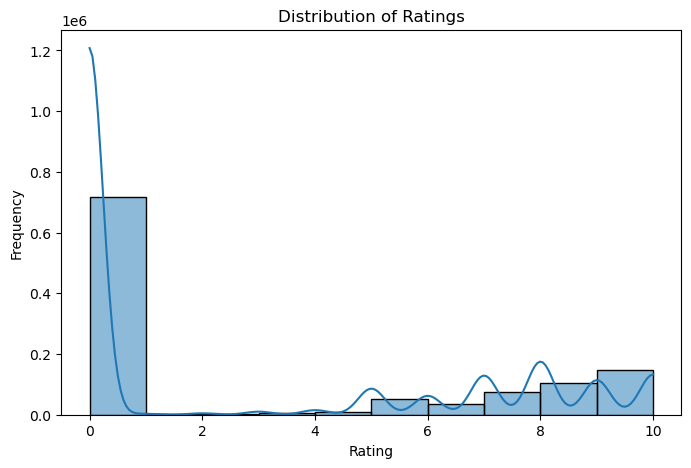

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(ratings["Book-Rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


## Most Active Users (Users Who Rate the Most)

C:\Users\Nasir\AppData\Local\Temp\ipykernel_9108\774688249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="viridis")


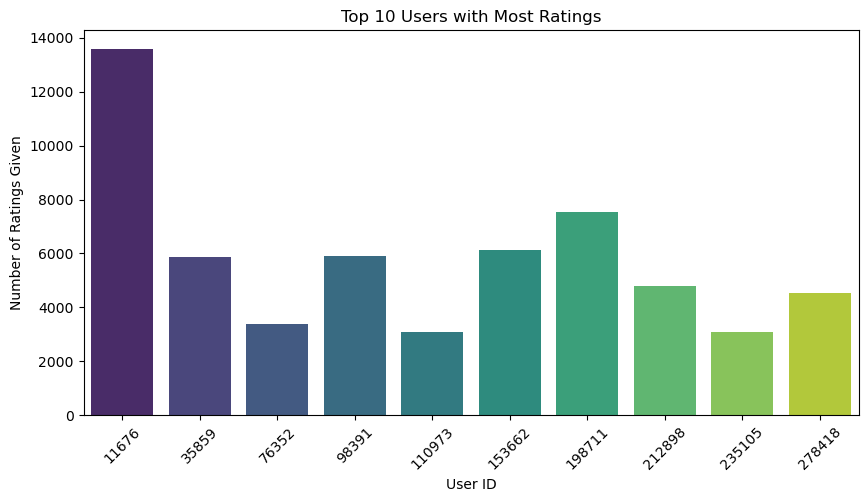

In [17]:
top_users = ratings["User-ID"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index, y=top_users.values, palette="viridis")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings Given")
plt.title("Top 10 Users with Most Ratings")
plt.xticks(rotation=45)
plt.show()


## Analyzing Age Distribution

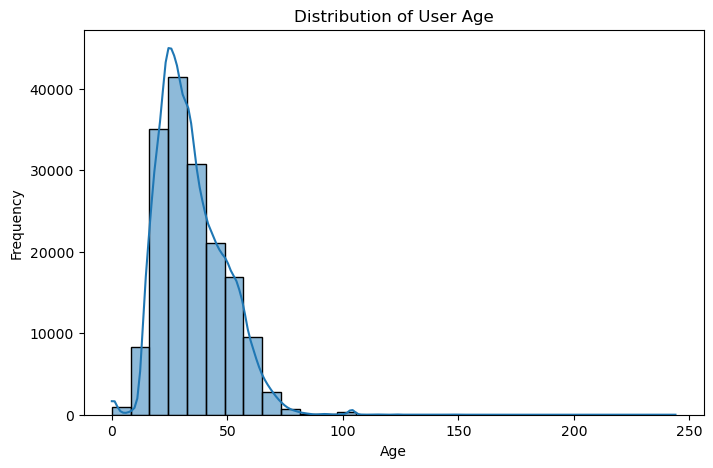

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(users["Age"], bins=30, kde=True)
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## Top Authors/Publishers

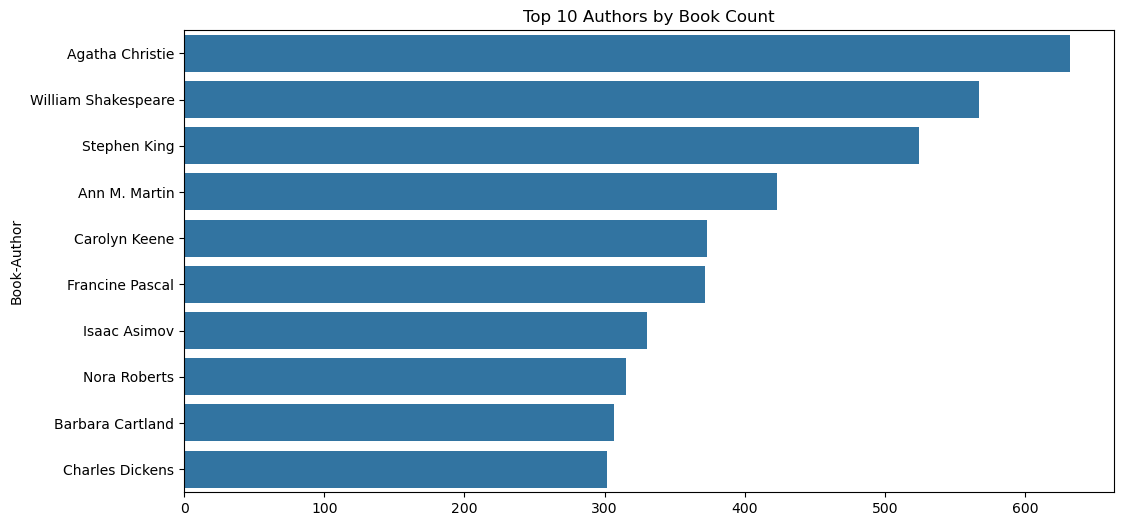

In [21]:
top_authors = books['Book-Author'].value_counts().head(10)
top_publishers = books['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors by Book Count')
plt.show()

## Top Locations

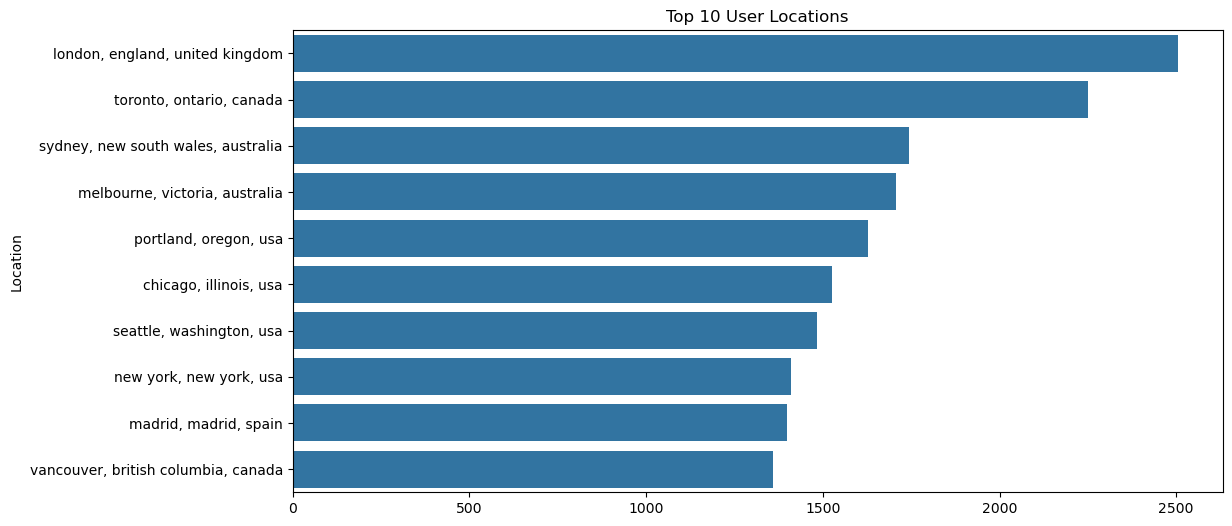

In [23]:
top_locations = users['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 User Locations')
plt.show()

# Popularity-based recommendation system

In [25]:
ratings_name = ratings.merge(books, on = 'ISBN')

In [26]:
ratings_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [27]:
num_rating_df = ratings_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns = {'Book-Rating':'num_ratings'}, inplace = True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [28]:
ratings_name['Book-Rating'] = pd.to_numeric(ratings_name['Book-Rating'], errors='coerce')
ratings_name = ratings_name.dropna(subset=['Book-Rating'])
avg_rating_df = ratings_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [29]:
popular_df = num_rating_df.merge(avg_rating_df, on = 'Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [30]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_rating', ascending = False).head(50)

In [31]:
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [56]:
popular_df = popular_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_rating']]

In [58]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collaborative Filtering-based Recommender System

In [89]:
x = ratings_name.groupby('User-ID').count()['Book-Rating'] > 200
educated_users = x[x].index

In [97]:
filtered_rating=ratings_name[ratings_name['User-ID'].isin(educated_users)]

In [129]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [131]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [135]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)] 

In [141]:
pt = final_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [185]:
pt.fillna(0, inplace = True)

In [147]:
from sklearn.metrics.pairwise import cosine_similarity

In [153]:
similarity_scores = cosine_similarity(pt)

In [193]:
similarity_scores.shape

(706, 706)

In [205]:
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key = lambda x : x[1], reverse = True)[1:6]
    for i in similar_items: 
        print(pt.index[i[0]])

In [203]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
